# Define the sinusoid signal and plot it.

#### Zu-Cheng Chen, Feb 2019

In [2]:
# load packages
using WAV
using Plots
gr()
using FFTW
using DSP
import LinearAlgebra:norm

In [ ]:
firfilt

In [ ]:
function FIRfreqz(b::Array, w = range(0, stop=π, length=1024))
    n = length(w)
    h = Array{ComplexF32}(undef, n)
    sw = 0
    for i = 1:n
      for j = 1:length(b)
        sw += b[j]*exp(-im*w[i])^-j
      end
      h[i] = sw
      sw = 0
    end
    return h
end

## Define the sinusoid signal.
The signal is  by
$$
s(t) = A \sin(2\pi f_0 t + \phi_0),
$$
where $A$ is the $snr$.

In [2]:
"""
SinSig(dataT, snr, f0, f1, ϕ0) generates a sinusoid signal S. 
dataT is the vector of time stamps at which the samples 
of the signal are to be computed. 
snr is the matched filtering signal-to-noise ratio of S, 
and [f0, ϕ0] are coefficients that parametrize the phase of the signal: 
2π*f0*dataT + ϕ0.
"""
function SinSig(dataT, snr::Real, f0::Real, ϕ0::Real)
    phaseVec = 2π*f0*dataT .+ ϕ0
    sigVec = sin.(phaseVec)
    sigVec = snr*sigVec/norm(sigVec)
end

# test the function
SinSig(1, 1, 1, 1), SinSig([1,2], 1, 1, 1)

(1.0, [0.707107, 0.707107])

In [3]:
?SinSig

search: SinSig SubstitutionString



SinSig(dataT, snr, f0, f1, ϕ0) generates a sinusoid signal S.  dataT is the vector of time stamps at which the samples  of the signal are to be computed.  snr is the matched filtering signal-to-noise ratio of S,  and [f0, ϕ0] are coefficients that parametrize the phase of the signal:  2π*f0*dataT + ϕ0.


## Plot the signal.

In [4]:
#Set signal parameters.
snr = 10;
f0 = 20;
f1 = 20;
ϕ0 = π;

In [5]:
#Instantaneous frequency after 1 sec.
maxFreq = 2π*f0 + ϕ0;
samplFreq = 5*maxFreq;
samplIntrvl = 1/samplFreq;

In [6]:
#Time samples.
times = collect(0:samplIntrvl:1.0);

# Number of samples
nSamples = length(times);

# Generate the signal.
signals = SinSig(times, snr, f0, ϕ0);

### Plot the signal.

In [3]:
plot(times,signals)

UndefVarError: UndefVarError: times not defined

### Plot the periodogram.

In [8]:
# Length of data 
dataLen = times[end]-times[1]

# DFT sample corresponding to Nyquist frequency
kNyq = Int(floor(nSamples/2)+1)

# Positive Fourier frequencies
posFreq = (0:(kNyq-1))*(1/dataLen);

# FFT of signal
fftSig = fft(signals);

# Discard negative frequencies
fftSig = fftSig[1:kNyq];

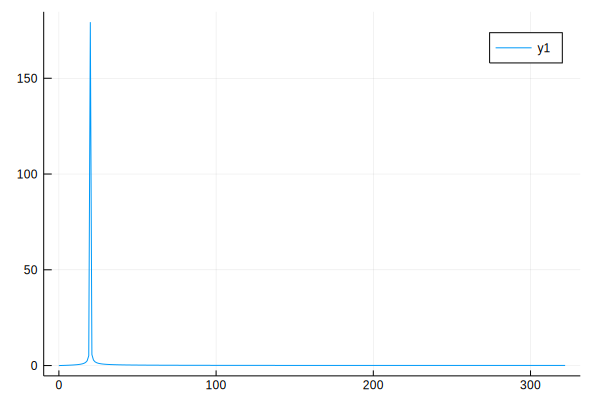

In [9]:
# Plot periodogram
plot(posFreq,abs.(fftSig))